
<h2>[Problem 1] Number of wheat on a 2 x 2 square chess board</h2>



In [37]:
import numpy as np
# There is 1 wheat at the top-left cell
small_board_ndarray = np.array([1])
# Arrage the list into chess board 2x2 by "reshape" built-in function
for _ in range (1,4):
     small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
# Reshape the ndarray from 1x4 to 2x2
small_board_ndarray = small_board_ndarray.reshape(2,2)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray)) 

Arrange wheat on a plate of 4 squares (ndarray)：[[1 2]
 [4 8]]



<h2>[Problem 2] Expansion to n × m mass</h2>



In [3]:
def wheat_chess_board_with_list(n, m):
    """
    A function that returns a ndarray containing the number of wheat on an nxm chess board.
    --------------
    n: int
        the width of chess board
    m: int
        the length of chess board
    Returns
    --------------
    board_ndarray
        ndarray containing the number of wheat on an nxm chess board.
    """
    board_list = []
    row_list = [1]
    for i in range(n*m):
      if (i+1)%8 != 0:
        row_list.append(2*row_list[-1])
      else:
        board_list.append(row_list)
        row_list = [row_list[-1]*2]
    return board_list

In [4]:
chess_board_list_8_8 = wheat_chess_board_with_list(8,8)
# Uncomment to check the returned array
# print(chess_board_list_8_8)
total_number_of_wheat = 0
for row in chess_board_list_8_8:
    for column in row:
        total_number_of_wheat += column
print("The number of wheat in the 8x8 chess board: {}".format(total_number_of_wheat))

The number of wheat in the 8x8 chess board: 18446744073709551615



<h2>[Problem 3] Total number of wheat</h2>


In [5]:
# I decided to use ndarray to handle the average (and it is so short!)

In [6]:
def wheat_chess_board_with_broadcast(n, m):
    """
    A function that returns a ndarray containing the number of wheat on an nxm chess board.
    --------------
    n: int
        the width of chess board
    m: int
        the length of chess board
    Returns
    --------------
    nd_chessboard
        ndarray containing the number of wheat on an nxm chess board.
    """
    # ndarray created with inital random value.
    # "uint64" handled the large number, int64 still overflows at 2^63 :D :D
    board_ndarray = np.arange(n*m, dtype=np.uint64)
    board_ndarray = 2**board_ndarray.reshape(n,m)
    return board_ndarray

In [7]:
chess_board_8_8 = wheat_chess_board_with_broadcast(8,8)
# Uncomment to check the returned array
# print(chess_board_8_8)
# Choose all the row of chess board
row_to_choose = np.arange(8)
# The list of mean of each column
mean_column = []
# Select the column = k and save it
for k in range(8):
  # choose each column, respectively
  column_to_slice = np.array(list(k for i in range(8)))
  # slice and get average (mean)
  mean_column.append(np.mean(chess_board_8_8[row_to_choose, column_to_slice]))

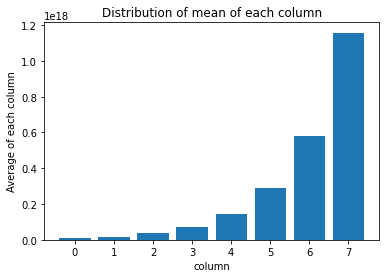

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("Average of each column")
plt.title("Distribution of mean of each column")
plt.bar(np.arange(0,8), mean_column)
plt.show()

<h2>[Problem 4] Heat map of the number of wheat</h2>

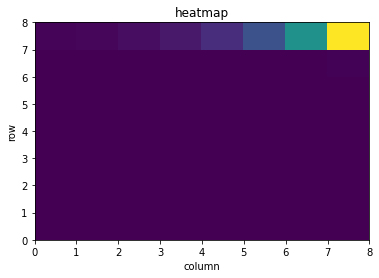

In [9]:
# Small values are purple and large values are yellow.
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chess_board_8_8)
plt.show()

<h2>[Problem 5] How many times is the second half as long as the first half?</h2>

In [10]:
print("times the number of wheat in the second half of the chessboard is greater than the number of wheat in the first half: {} times".format(np.sum(chess_board_8_8[4:8])/np.sum(chess_board_8_8[0:4])))

times the number of wheat in the second half of the chessboard is greater than the number of wheat in the first half: 4294967296.0 times


<h2>[Problem 6] Expansion to n × m mass by another calculation method</h2>

In [11]:
def wheat_chess_board_with_append(n, m):
    """
    A function that returns a ndarray containing the number of wheat on an nxm chess board.
    --------------
    n: int
        the width of chess board
    m: int
        the length of chess board
    Returns
    --------------
    board_ndarray
        ndarray containing the number of wheat on an nxm chess board.
    """
    board_ndarray = np.array([1], dtype=np.uint64)
    for _ in range(n*m - 1):
      board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
    board_ndarray = board_ndarray.reshape(n,m).astype(np.uint64)
    return board_ndarray

In [12]:
def wheat_chess_board_with_broadcast(n, m):
    """
    A function that returns a ndarray containing the number of wheat on an nxm chess board.
    --------------
    n: int
        the width of chess board
    m: int
        the length of chess board
    Returns
    --------------
    nd_chessboard
        ndarray containing the number of wheat on an nxm chess board.
    """
    # ndarray created with inital random value.
    # "uint64" handled the large number, int64 still overflows at 2^63 :D :D
    board_ndarray = np.arange(n*m, dtype=np.uint64)
    board_ndarray = 2**board_ndarray.reshape(n,m)
    return board_ndarray

In [13]:
print("Are these 2 method return the same ndarray? Answer: {}".format(np.array_equal(wheat_chess_board_with_append(8,8),wheat_chess_board_with_broadcast(8,8))))

Are these 2 method return the same ndarray? Answer: True


In [14]:
print("Are these 2 method also same with List of chess board before? Answer: {}".format(np.array_equal(wheat_chess_board_with_append(8,8),np.array(chess_board_list_8_8))))

Are these 2 method also same with List of chess board before? Answer: True


<h2>[Problem 7] Comparing calculation times

In [15]:
%%timeit
wheat_chess_board_with_list(8, 8)

15.7 µs ± 464 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%%timeit
wheat_chess_board_with_append(8,8)

466 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%%timeit
wheat_chess_board_with_broadcast(8,8)

3.57 µs ± 57.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<h3> Conclusion: </h3>
Using the <b>Broadcast</b> really really does the bussiness. <b>Append</b> method with numpy array is the worst time complexity due to the continuous re-arraged the list of numpy.<br>
Using default <b>List</b> is still using append method but with the original <b>List</b> instead of Numpy library, so it still better to some extent.